# Histograms of docking scores

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
from time import time
import numpy as np
import pandas as pd
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
print(Path.cwd())

/vol/ml/apartin/projects/covid-19/mol-features/nbs


In [2]:
datadir = Path('../data/raw/dock-2020-06-01/OZD')
outfigs = Path('../data/raw/dock-2020-06-01/OZD-hist')
os.makedirs(outfigs, exist_ok=True)
files = sorted(datadir.glob('*4col.csv'))
len(files)

35

In [3]:
def save_hist(dd_trg, trg_name, score_name='reg'):
#     score_name = 'reg'
# #     trg_name = 'Chemgauss4'
#     score_name_original = 'Chemgauss4'
#     dd_trg = dd_trg.rename(columns={score_name_original: score_name})
    dd_trg = dd_trg[ ~dd_trg[score_name].isna() ].reset_index(drop=True)
#     dd_trg = dd_trg.rename(columns={trg_name: score_name})
    dd_trg[score_name] = abs( np.clip(dd_trg[score_name], a_min=None, a_max=0) )

    q_cls=0.025
    cls_th = dd_trg[score_name].quantile(q=q_cls)

    bins = 50
    hist, bin_edges = np.histogram(dd_trg[score_name], bins=bins)
    x = np.ones((10,)) * cls_th
    y = np.linspace(0, hist.max(), len(x))

    fig, ax = plt.subplots()
    plt.hist(dd_trg[score_name], bins=bins, density=False, facecolor='b', alpha=0.5)
    plt.title(f'Scores Clipped to 0: {trg_name}');
    plt.ylabel('Count'); plt.xlabel('Docking Score');
    plt.plot(x, y, 'r--', alpha=0.7, label=f'{q_cls}-th quantile')
    plt.grid(True)
    plt.savefig(outfigs/f'dock.score.{trg_name}.png');

In [4]:
def cast_to_float(x, float_format=np.float64):
    try:
        x = np.float64(x)
    except:
        print("Could not cast the value to numeric: {}".format(x))
        x = np.nan
    return x

In [5]:
# df_in = pd.read_csv(files[14]) # .sort_values('TITLE')
# files[0].name.split('.')[0]
# df_in.tail()

In [6]:
# score_name = 'reg'
# df_in = df_in.rename(columns={'Chemgauss4': score_name}) 
# df_in.tail()

In [7]:
# reg_col = df_in[score_name].map(lambda x: cast_to_float(x) )
# df_in.tail()

In [8]:
# df_in = df_in[~reg_col.isna()].reset_index(drop=True)
# df_in.tail()

In [9]:
# df_in = df_in.reset_index(drop=True)
# df_in[score_name] = df_in[score_name].astype(np.float64)
# df_in.tail()

Loading 1 ... 3CLPro_7BQY_A_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 2 ... ADRP_6W02_A_1_H.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 3 ... NPRBD_6VYO_AB_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 4 ... NPRBD_6VYO_A_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 5 ... NPRBD_6VYO_BC_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 6 ... NPRBD_6VYO_CD_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 7 ... NPRBD_6VYO_DA_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 8 ... NSP10-16_6W61_AB_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 9 ... NSP10-16_6W61_AB_2_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 10 ... NSP10_6W61_B_1_F.Orderable_zinc_db_enaHLL.sorted.4col.csv
Loading 11 ... NSP13_HELICASE_5WWP_0_A_A__DU__apo_PHE_A-145.Orderable_zinc_db_enaHLL.sorted.4col.csv
  empty
Loading 12 ... NSP13_HELICASE_5WWP_1_A_A__DU__apo_PHE_A-145.Orderable_zinc_db_enaHLL.sorted.4col.csv
  empty
Loading 13 ... NSP13_HELICASE_6JYT_1_A_A__DU__apo

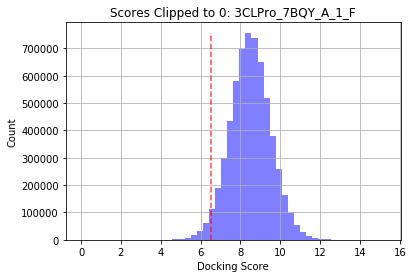

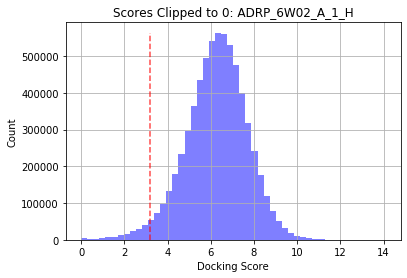

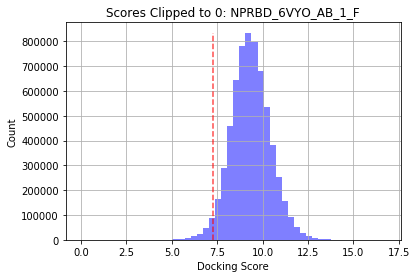

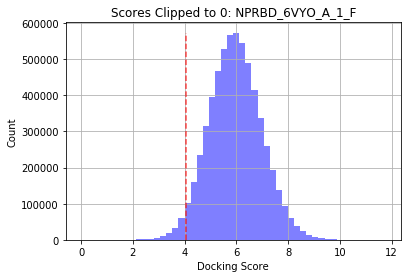

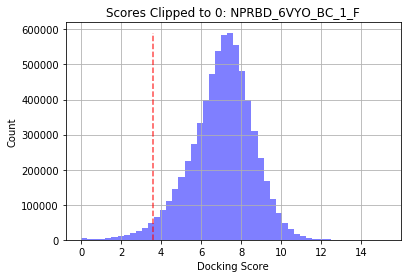

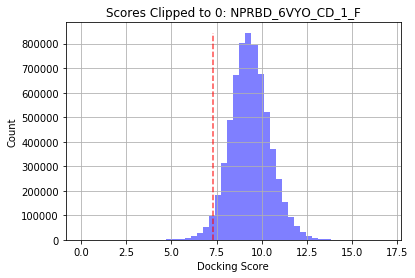

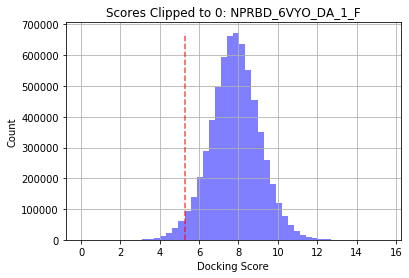

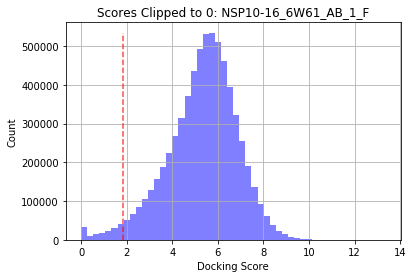

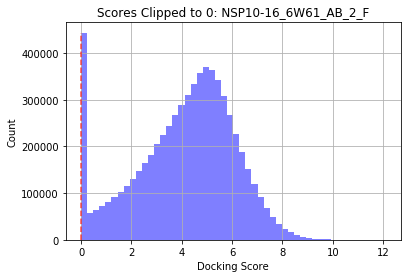

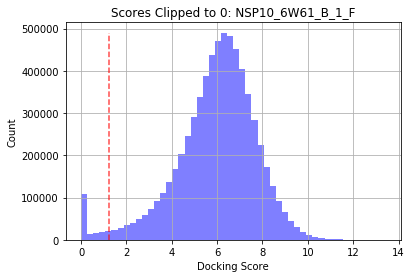

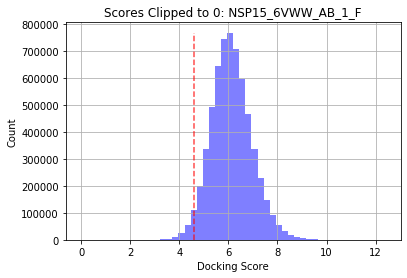

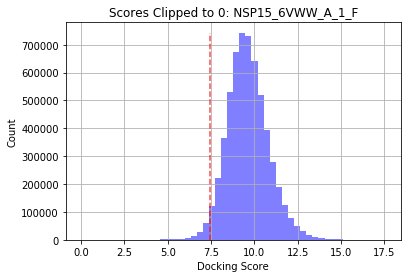

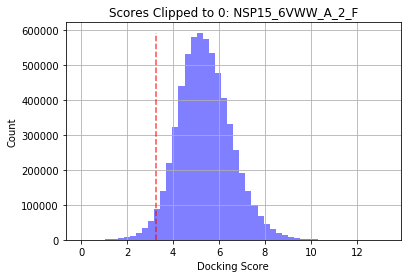

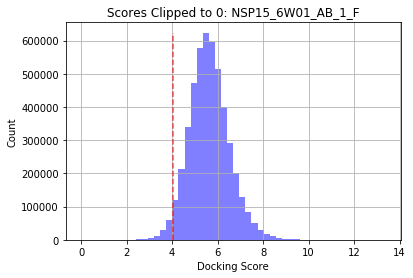

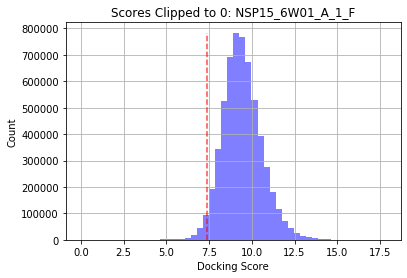

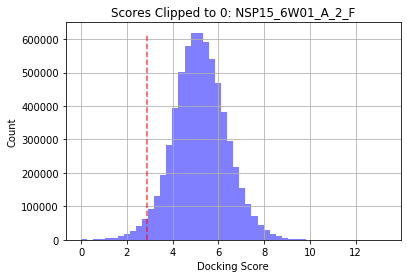

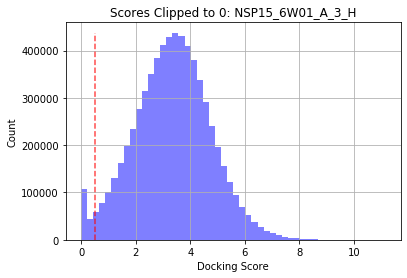

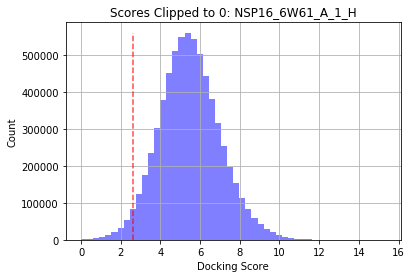

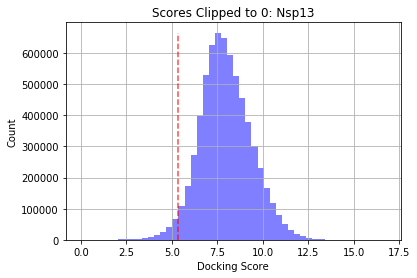

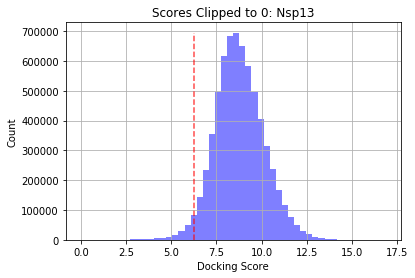

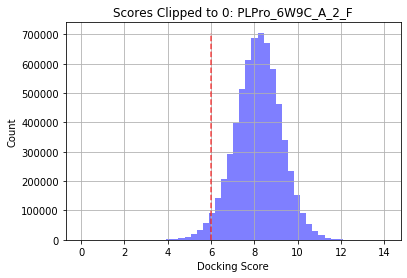

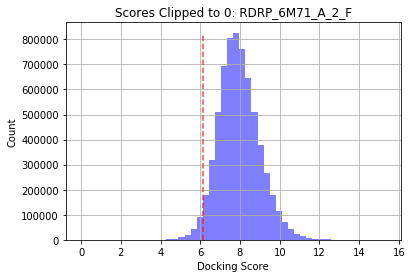

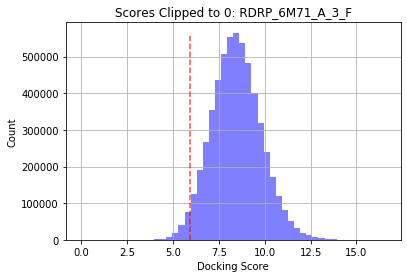

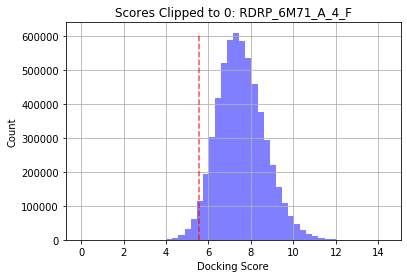

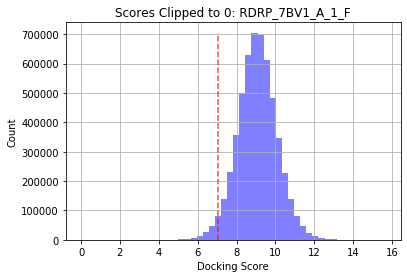

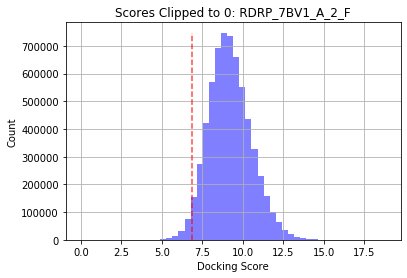

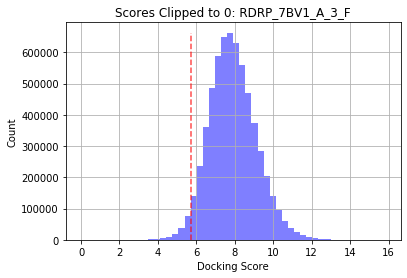

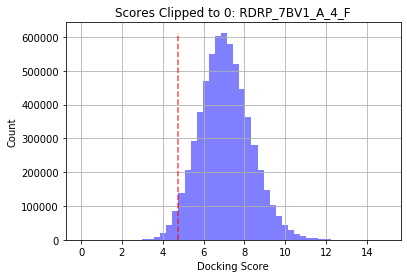

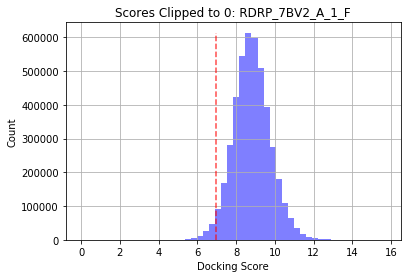

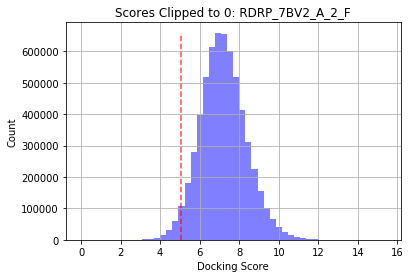

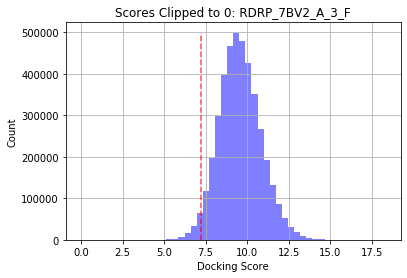

In [10]:
t0 = time()
cols = ['Inchi-key','SMILES','TITLE']

for i, f in enumerate(files):
    print(f'Loading {i+1} ... {f.name}')
    df_in = pd.read_csv(f)
    if df_in.empty:
        print('  empty')
        continue
        
    score_name = 'reg'
    df_in = df_in.rename(columns={'Chemgauss4': score_name})        
        
    reg_col = df_in[score_name].map(lambda x: cast_to_float(x) )
    df_in = df_in[~reg_col.isna()].reset_index(drop=True)
    df_in = df_in.reset_index(drop=True)
    df_in[score_name] = df_in[score_name].astype(np.float64)
    
    trg_name = files[i].name.split('.')[0]
    save_hist(dd_trg=df_in, trg_name=trg_name)
